In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_period_dtype

dataf = pd.read_csv("data_clean.csv")
dataf.head(15)

,Id,Data,Produto,Categoria,Quantidade,Preco,mes
0,1,2023-01-04,Notebook,Eletrodoméstico,30,149,2023-01-01
1,9,2023-02-01,Celular,Eletrodoméstico,50,535,2023-02-01
2,45,2023-02-10,Celular,Eletrodoméstico,100,480,2023-02-01
3,19,2023-02-12,Celular,Eletrodoméstico,400,990,2023-02-01
4,28,2023-02-13,Sofá,Mobilia,70,940,2023-02-01
5,48,2023-02-18,Caderno,Acessório,50,765,2023-02-01
6,31,2023-03-03,Cadeira,Mobilia,30,675,2023-03-01
7,23,2023-03-19,Sofá,Mobilia,100,533,2023-03-01
8,5,2023-04-08,Celular,Eletrodoméstico,30,504,2023-04-01
9,11,2023-04-09,Prateleira,Mobilia,50,699,2023-04-01


In [10]:
#Verificando se o tipo da coluna mes está certa

if dataf['mes'].dtype == 'object':
    dataf['mes'] = pd.to_datetime(dataf['mes'],errors = 'coerce')
#O is_period_dtype verifica se o tipo da coluna é Period[M] para alterar para datetime64
elif is_period_dtype(dataf['mes']):
    dataf['mes'] = dataf['mes'].dt.to_timestamp()

print(dataf['mes'].dtype)

datetime64[ns]


In [29]:
faturamento = []
tempo = []

#convertendo a coluna Data para tipo datetime
dataf['Data'] = pd.to_datetime(dataf['Data'], errors='coerce')

#faturamento das vendas e inserindo na lista faturamento
for _,n in dataf.iterrows():
    acresc = n['Quantidade']*n['Preco']
    faturamento.append(acresc)

faturamento.sort()

#iterando os meses e inserindo cada mes na lista tempo
for _,k in dataf.iterrows():
    lin_tempo = k['mes']
    tempo.append(lin_tempo)

#convertendo a lista tempo em tipo periodindex e depois em datetime
tempo = pd.PeriodIndex(tempo,freq = 'M').to_timestamp()


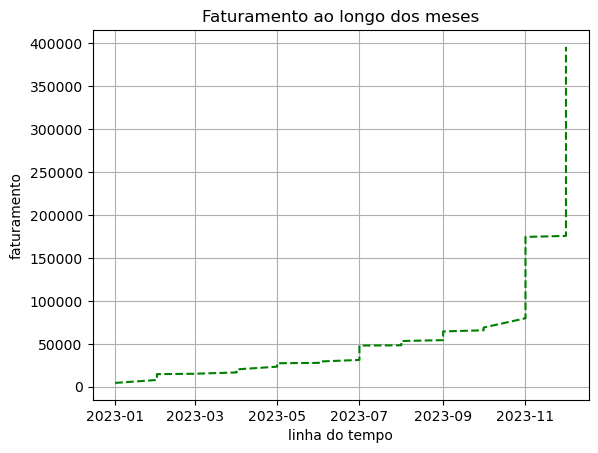

In [30]:
# Gerando o gráfico com o tempo da abscissa e o faturamento no eixo das ordenadas 
graf = plt.plot(tempo, faturamento, color = 'green',linestyle = 'dashed')

plt.xlabel("linha do tempo")
plt.ylabel("faturamento")
plt.grid(True)
plt.title("Faturamento ao longo dos meses")

plt.show()

In [31]:
# Os 2 padrões identificados: 1) entre o mes de janeiro até setembro o crescimento do faturamento cresce com uma resistência ascentuada
#2) Na amostra aleatória analisada atualmente tem mais mobilia do que eletrodomésticos, mas isso pode variar dependendo da aleatoriedade do dataset criado

soma_eletro = 0
soma_mob = 0

for n in dataf['Categoria']:
        if n == 'Eletrodoméstico':
            soma_eletro += 1
        elif n == 'Mobilia':
            soma_mob += 1
            
print(f"A quantidade de eletrodoméstico é {soma_eletro}")
print(f"A quantidade de mobília é {soma_mob}")

A quantidade de eletrodoméstico é 14
A quantidade de mobília é 26
